### Objective:
Analyze Zomato's quarterly performance using financial KPIs (Revenue, Net Profit, EPS) and stock price trends to understand the company's business trajectory.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('zomato_data.csv')
df.head()


,Quarter,Revenue(Cr),Net Profi(Cr),EPS,Stock Price
0,Mar'22,1212.0,-360.0,-0.46,82.30
1,Jun'22,1414.0,-186.0,-0.24,53.90
2,Sep-'22,1661.0,-251.0,-0.29,62.35
3,Dec-'22,1948.2,-346.6,-0.41,59.35
4,Mar-'23,2056.0,-189.0,-0.22,50.96


In [2]:
# Clean column names
df.columns = ['Quarter', 'Revenue', 'Net_Profit', 'EPS', 'Stock_Price']
df.head()


,Quarter,Revenue,Net_Profit,EPS,Stock_Price
0,Mar'22,1212.0,-360.0,-0.46,82.30
1,Jun'22,1414.0,-186.0,-0.24,53.90
2,Sep-'22,1661.0,-251.0,-0.29,62.35
3,Dec-'22,1948.2,-346.6,-0.41,59.35
4,Mar-'23,2056.0,-189.0,-0.22,50.96


In [3]:
# Ensure numeric data types
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Net_Profit'] = pd.to_numeric(df['Net_Profit'], errors='coerce')
df['EPS'] = pd.to_numeric(df['EPS'], errors='coerce')
df['Stock_Price'] = pd.to_numeric(df['Stock_Price'], errors='coerce')


Visualize Trend


REVENUE AND NET PROFIT

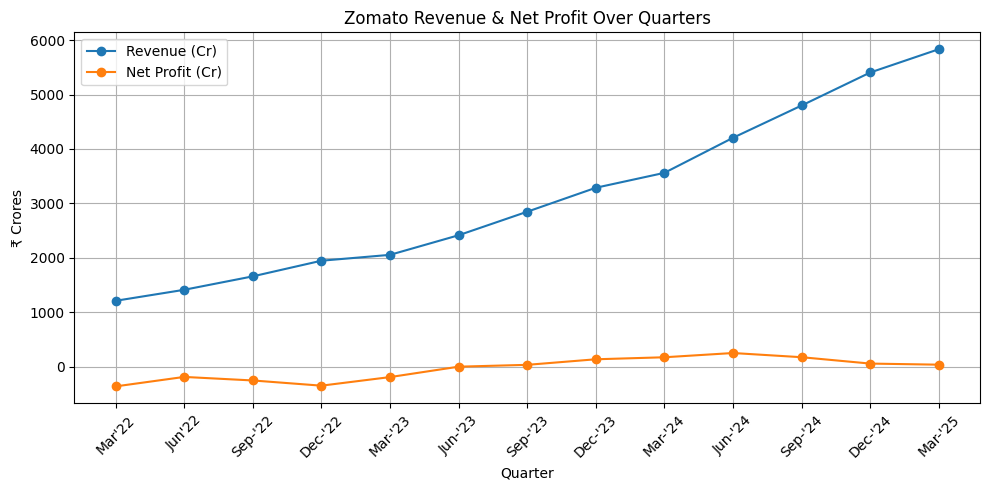

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['Quarter'], df['Revenue'], label='Revenue (Cr)', marker='o')
plt.plot(df['Quarter'], df['Net_Profit'], label='Net Profit (Cr)', marker='o')
plt.title('Zomato Revenue & Net Profit Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('₹ Crores')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


EPS and Stock Price

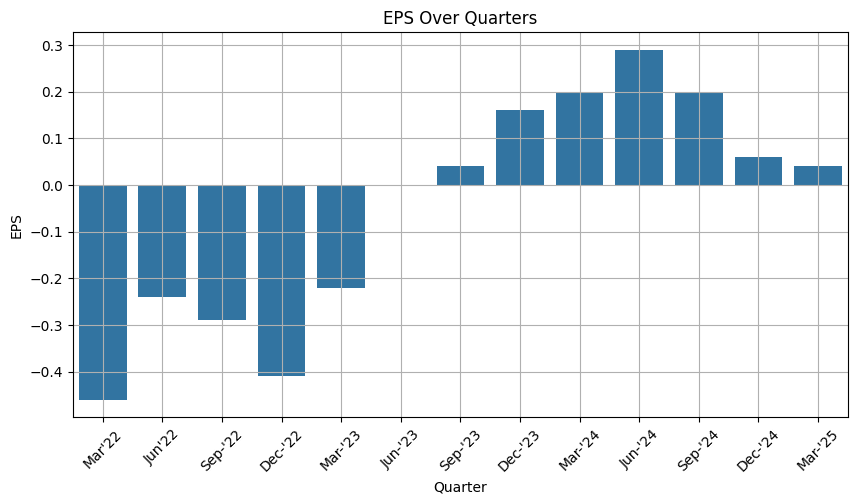

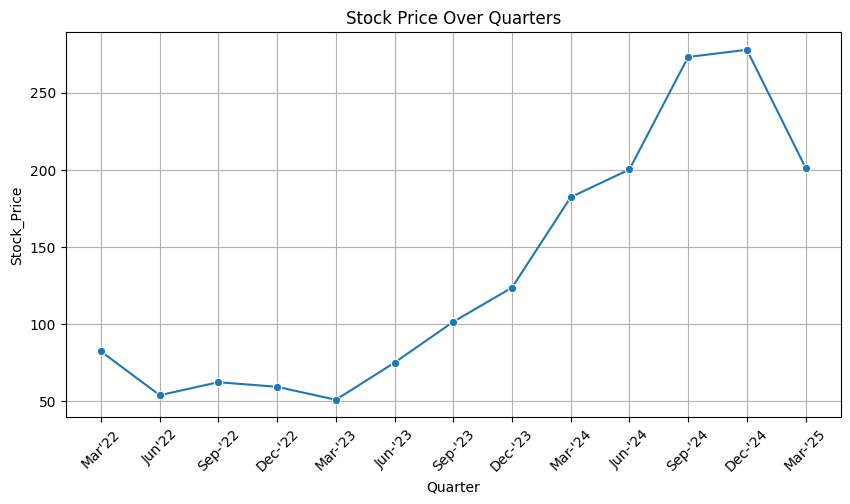

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='EPS', data=df)
plt.title('EPS Over Quarters')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Quarter', y='Stock_Price', data=df, marker='o')
plt.title('Stock Price Over Quarters')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Key Insights:
- Revenue grew steadily, especially after Mar'22.
- Net losses reduced over time, indicating improving profitability.
- Stock price dipped post IPO but stabilized later.
- EPS remains negative, but shows a slight upward trend.


In [10]:
# Summary statistics for EPS
print(df['EPS'].describe())

# If you want summary stats for all features at once:
print(df[['Revenue', 'Net_Profit', 'EPS']].describe())


count    13.000000
mean     -0.048462
std       0.247617
min      -0.460000
25%      -0.240000
50%       0.040000
75%       0.160000
max       0.290000
Name: EPS, dtype: float64
           Revenue  Net_Profit        EPS
count    13.000000   13.000000  13.000000
mean   3126.784615  -34.969231  -0.048462
std    1542.654985  207.787662   0.247617
min    1212.000000 -360.000000  -0.460000
25%    1948.200000 -189.000000  -0.240000
50%    2848.000000   36.000000   0.040000
75%    4206.000000  138.000000   0.160000
max    5833.000000  253.000000   0.290000


In [11]:
#STANDARDISING THE FEATURES
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Revenue', 'Net_Profit', 'EPS']])

model = LinearRegression()
model.fit(X_scaled, y)

print("R-squared:", model.score(X_scaled, y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared: 0.8846322903095166
Coefficients: [  66.38428757  415.04058038 -406.80594469]
Intercept: 134.20384615384614


Actual vs Predicted Stock Price

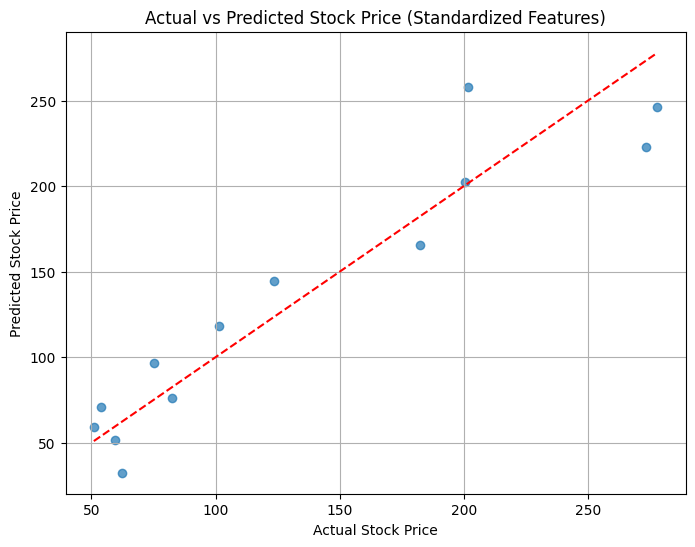

In [12]:
import matplotlib.pyplot as plt

# Predict stock prices using the standardized features model
y_pred_scaled = model.predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_scaled, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Stock Price (Standardized Features)')
plt.grid(True)
plt.show()


## Linear Regression Model: Predicting Zomato Stock Price

### Objective:
To predict Zomato's stock price using key financial indicators: Revenue, Net Profit, and EPS. The model aims to understand how strongly these metrics influence market performance.

### Features Used:
- **Revenue**
- **Net Profit**
- **EPS (Earnings Per Share)**  
(All features were standardized before modeling.)

### Model:
- **Linear Regression** using `scikit-learn`

### Coefficients:
- Revenue: +66.38  
- Net Profit: +415.04  
- EPS: **−406.81**  
These coefficients suggest that:
- Higher revenue and net profit are associated with increased stock prices.
- Surprisingly, EPS has a negative coefficient — possibly due to multicollinearity or data limitations.

### Performance:
- **R² Score**: **0.88**  
  → The model explains ~88% of the variance in stock price.
- **Intercept**: 134.20

### Visualization:
The plot below shows **actual vs. predicted stock prices**. Points closer to the red line indicate better predictions. Most predictions fall close to the line, supporting the high R² score.

### Conclusion:
The model demonstrates a strong linear relationship between Zomato’s financials and its stock price. While the dataset is small, the results indicate that financial metrics like net profit have a strong predictive effect. For further improvement, incorporating more data (e.g., quarterly sentiment, market events) or trying non-linear models could enhance prediction accuracy.


 Residual Plot

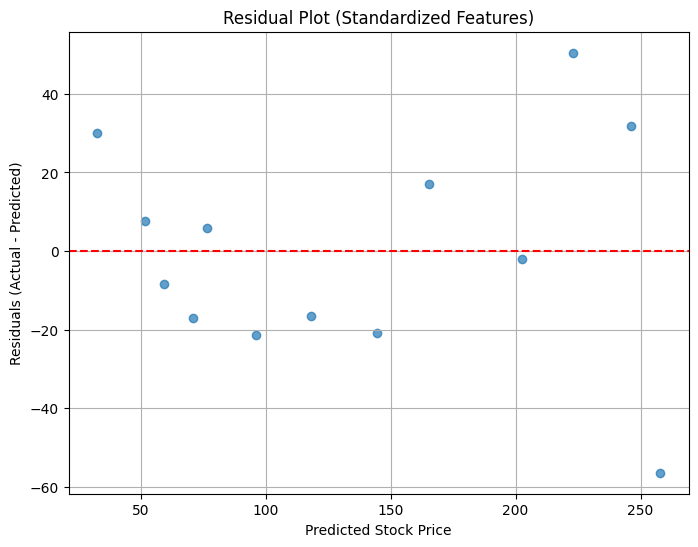

In [13]:
residuals_scaled = y - y_pred_scaled

plt.figure(figsize=(8,6))
plt.scatter(y_pred_scaled, residuals_scaled, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # zero residual line
plt.xlabel('Predicted Stock Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Standardized Features)')
plt.grid(True)
plt.show()


Bar Chart of Coefficients

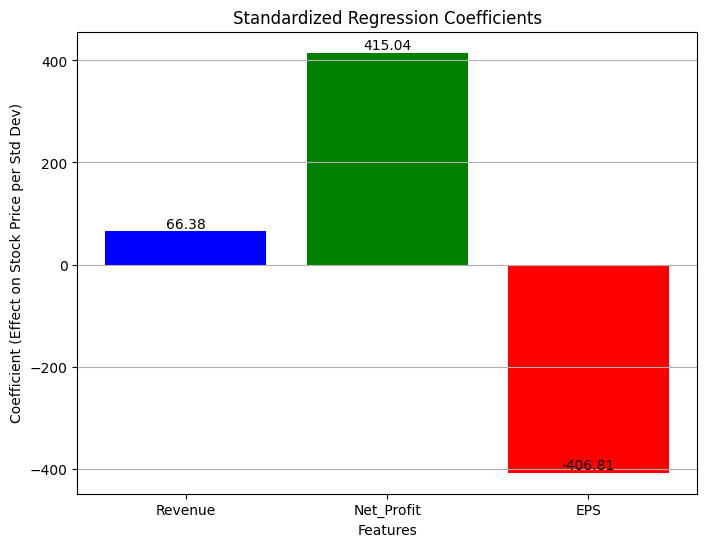

In [14]:
features = ['Revenue', 'Net_Profit', 'EPS']
coefficients = model.coef_

plt.figure(figsize=(8,6))
bars = plt.bar(features, coefficients, color=['blue', 'green', 'red'])
plt.xlabel('Features')
plt.ylabel('Coefficient (Effect on Stock Price per Std Dev)')
plt.title('Standardized Regression Coefficients')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


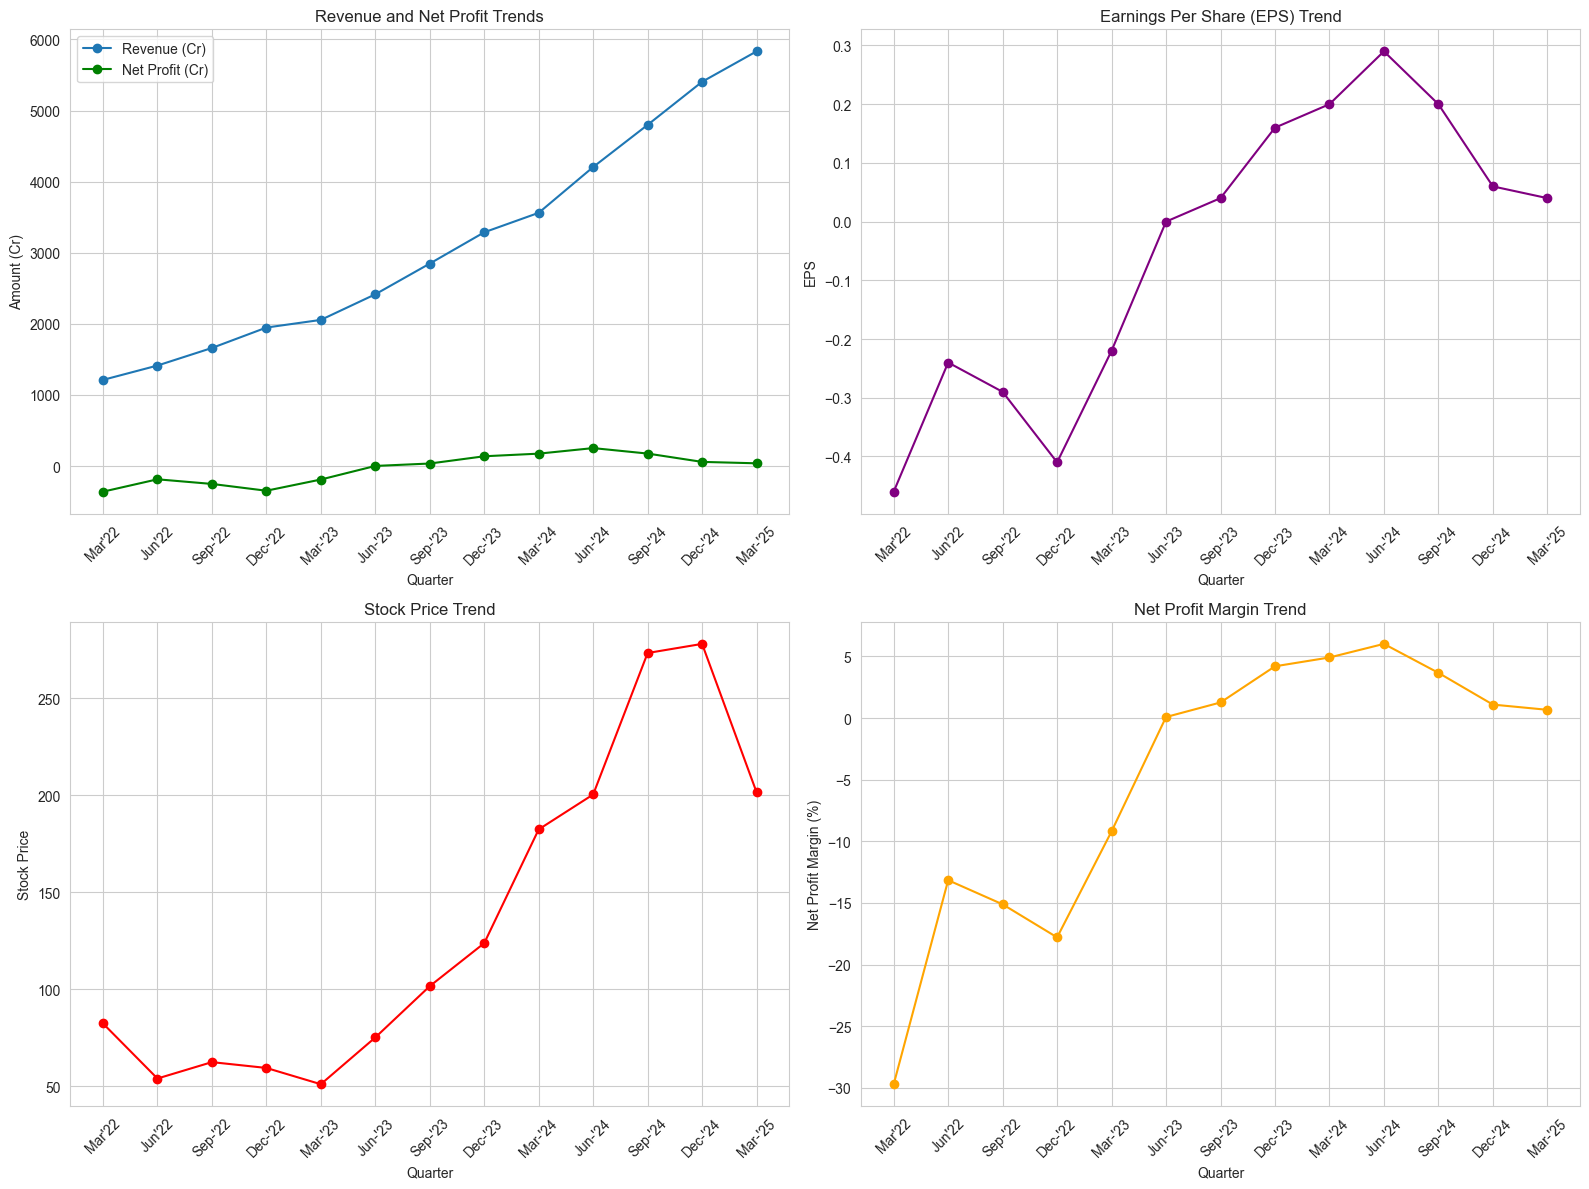

Most Recent Quarter: Mar-'25
Revenue: 5833.00 Cr
Net Profit: 39.00 Cr
Net Profit Margin: 0.67%
EPS: 0.04
Stock Price: 201.50
Revenue Change (from previous quarter): 7.92%


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'df' and has been loaded and cleaned.
# Ensure columns are renamed and numeric as per the previous working code.

# --- IMPORTANT: RENAME COLUMNS FIRST (if not already done in a prior cell) ---
df = df.rename(columns={
    'Revenue(Cr)': 'Revenue',
    'Net Profi(Cr)': 'Net_Profit',
    'Stock Price': 'Stock_Price'
})

# Now ensure all relevant columns are numeric
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Net_Profit'] = pd.to_numeric(df['Net_Profit'], errors='coerce')
df['EPS'] = pd.to_numeric(df['EPS'], errors='coerce')
df['Stock_Price'] = pd.to_numeric(df['Stock_Price'], errors='coerce')

# Drop any rows that might have become NaN after coercion
df.dropna(subset=['Revenue', 'Net_Profit', 'EPS', 'Stock_Price'], inplace=True)


# 1. Calculate Net Profit Margin
df['Net_Profit_Margin'] = (df['Net_Profit'] / df['Revenue']) * 100

# Set up the plotting style
sns.set_style("whitegrid")

# Create a figure and a set of subplots
# 2 rows, 2 columns for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Adjusted figsize for better readability

# Plot 1: Revenue and Net Profit Trends (Top-Left)
axes[0, 0].plot(df['Quarter'], df['Revenue'], marker='o', label='Revenue (Cr)')
axes[0, 0].plot(df['Quarter'], df['Net_Profit'], marker='o', label='Net Profit (Cr)', color='green')
axes[0, 0].set_title('Revenue and Net Profit Trends')
axes[0, 0].set_xlabel('Quarter')
axes[0, 0].set_ylabel('Amount (Cr)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: EPS Trend (Top-Right)
axes[0, 1].plot(df['Quarter'], df['EPS'], marker='o', color='purple')
axes[0, 1].set_title('Earnings Per Share (EPS) Trend')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('EPS')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# Plot 3: Stock Price Trend (Bottom-Left)
axes[1, 0].plot(df['Quarter'], df['Stock_Price'], marker='o', color='red')
axes[1, 0].set_title('Stock Price Trend')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Stock Price')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True)

# Plot 4: Net Profit Margin Trend (Bottom-Right)
axes[1, 1].plot(df['Quarter'], df['Net_Profit_Margin'], marker='o', color='orange')
axes[1, 1].set_title('Net Profit Margin Trend')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Net Profit Margin (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True)

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()

# Display Key Figures (Most Recent Quarter) - This part remains the same
last_quarter_data = df.iloc[-1]

print(f"Most Recent Quarter: {last_quarter_data['Quarter']}")
print(f"Revenue: {last_quarter_data['Revenue']:.2f} Cr")
print(f"Net Profit: {last_quarter_data['Net_Profit']:.2f} Cr")
print(f"Net Profit Margin: {last_quarter_data['Net_Profit_Margin']:.2f}%")
print(f"EPS: {last_quarter_data['EPS']:.2f}")
print(f"Stock Price: {last_quarter_data['Stock_Price']:.2f}")

if len(df) > 1:
    prev_quarter_data = df.iloc[-2]
    revenue_change = ((last_quarter_data['Revenue'] - prev_quarter_data['Revenue']) / prev_quarter_data['Revenue']) * 100
    print(f"Revenue Change (from previous quarter): {revenue_change:.2f}%")

### Conclusion:
Zomato appears to be on a recovery path with growing revenues and improving net profit margins. The company has also posted positive Earnings Per Share (EPS) in recent quarters, indicating progress toward sustainable profitability. While the stock price showed volatility post-IPO, recent trends suggest renewed investor confidence. Overall, the financial indicators reflect a company that is stabilizing and showing potential for long-term growth.

